Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 90s 47ms/step - accuracy: 0.7829 - loss: 0.6036
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 46ms/step - accuracy: 0.8905 - loss: 0.2995
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8807 - loss: 0.3144


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 731,360 (2.79 MB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 487,574 (1.86 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


ValueError: The layer sequential_1 has never been called and thus has no defined input.

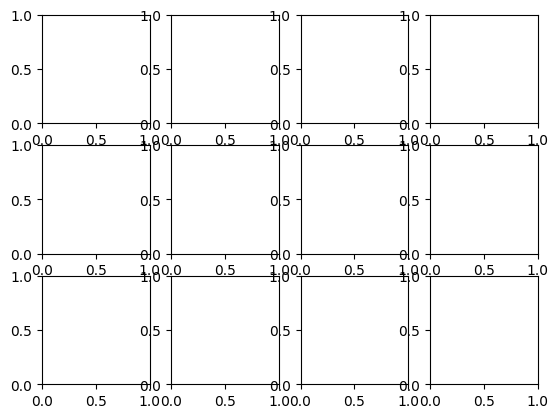

In [ ]:
import tensorflow as tf
mnist=tf.keras.datasets.fashion_mnist
(training_images,training_labels),(test_images,test_labels)=mnist.load_data()

#normalaization
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images/255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

#flatten : take square and convert it to 1D vector
#relu: removes the negative value into zero

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape=(28,28,1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

model.compile(optimizer=tf.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.95):
        print("\n Accuracy is 95%..terminating the training")
        self.model.stop_training=True

a=myCallback()

model.fit(training_images,training_labels,epochs=2,callbacks=[a])
test_loss, test_acc = model.evaluate(test_images, test_labels)

model.summary()


import matplotlib.pyplot as plt
f, axarr=plt.subplots(3,4)
FIRST_iMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER=1


from tensorflow.keras import models
dummy_input = tf.zeros((1, 28, 28, 1))
_ = model.predict(dummy_input)

layer_outputs= [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
for x in range (0,4):
    f1= activation_model.predict(test_image[FIRST_iMAGE].reshape(1,28,28,1))[x]
    axarr[0,x].imshow(f1[0, :,:,CONVOLUTION_NUMBER],cmap='inferno')
    axarr[0,x].grid(False)
    f2= activation_model.predict(test_image[SECOND_IMAGE].reshape(1,28,28,1))[x]
    axarr[1,x].imshow(f1[0, :,:,CONVOLUTION_NUMBER],cmap='inferno')
    axarr[1,x].grid(False)
    f3= activation_model.predict(test_image[THIRD_IMAGE].reshape(1,28,28,1))[x]
    axarr[2,x].imshow(f1[0, :,:,CONVOLUTION_NUMBER],cmap='inferno')
    axarr[2,x].grid(False)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 96s 50ms/step - accuracy: 0.7775 - loss: 0.6109
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8803 - loss: 0.3454


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 731,360 (2.79 MB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 487,574 (1.86 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


ValueError: The layer sequential_3 has never been called and thus has no defined input.

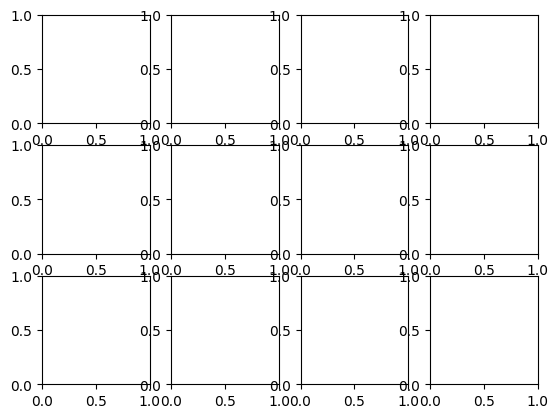

In [ ]:
import tensorflow as tf
mnist=tf.keras.datasets.fashion_mnist
(training_images,training_labels),(test_images,test_labels)=mnist.load_data()

#normalaization
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images/255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

#flatten : take square and convert it to 1D vector
#relu: removes the negative value into zero

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape=(28,28,1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

model.compile(optimizer=tf.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.95):
        print("\n Accuracy is 95%..terminating the training")
        self.model.stop_training=True

a=myCallback()

model.fit(training_images,training_labels,epochs=1,callbacks=[a])
test_loss, test_acc = model.evaluate(test_images, test_labels)

model.summary()


import matplotlib.pyplot as plt
f, axarr=plt.subplots(3,4)
FIRST_iMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER=1


from tensorflow.keras import models
# Call the model to define the input
# This will fix the "The layer sequential_1 has never been called" error
dummy_input = tf.zeros((1, 28, 28, 1))
_ = model.predict(dummy_input)

layer_outputs= [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=model.layer_outputs)
for x in range (0,4):
    f1= activation_model.predict(test_images[FIRST_iMAGE].reshape(1,28,28,1))[x] # Use test_images instead of test_image
    axarr[0,x].imshow(f1[0, :,:,CONVOLUTION_NUMBER],cmap='inferno')
    axarr[0,x].grid(False)
    f2= activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28,1))[x] # Use test_images instead of test_image
    axarr[1,x].imshow(f2[0, :,:,CONVOLUTION_NUMBER],cmap='inferno') # Display f2 instead of f1
    axarr[1,x].grid(False)
